# Preconfigured Energy Balance Models

In this document the basic use of climlab's preconfigured EBM class is shown. 

Contents are how to

  * setup an EBM model
  * show and access subprocesses
  * integrate the model
  * access and plot various model variables
  * calculate the global mean of the temperature

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

### Model Creation

The regular path for the EBM class is ``climlab.model.ebm.EBM`` but it can also be accessed through ``climlab.EBM``

An EBM model instance is created through

In [2]:
# model creation
ebm_model = climlab.EBM()

By default many parameters are set during initialization:

``num_lat=90, S0=const.S0, A=210., B=2., D=0.55, water_depth=10., Tf=-10, a0=0.3, a2=0.078, ai=0.62, timestep=const.seconds_per_year/90., T0=12., T2=-40``

For further details see the climlab documentation.

Many of the input parameters are stored in the following dictionary:

In [3]:
# print model parameters
ebm_model.param

{'A': 210.0,
 'B': 2.0,
 'D': 0.555,
 'S0': 1365.2,
 'Tf': -10.0,
 'a0': 0.3,
 'a2': 0.078,
 'ai': 0.62,
 'timestep': 350632.51200000005,
 'water_depth': 10.0}

The model consists of one state variable (surface temperature) and a couple of defined subprocesses.

In [4]:
# print model states and suprocesses
print ebm_model

climlab Process of type <class 'climlab.model.ebm.EBM'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
   insolation: <class 'climlab.radiation.insolation.P2Insolation'>



### Model subprocesses

The subprocesses are stored in a dictionary and can be accessed through

In [5]:
# access model subprocesses
ebm_model.subprocess.keys()

['diffusion', 'LW', 'albedo', 'insolation']

So to access the time type of the Longwave Radiation subprocess for example, type:

In [6]:
# access specific subprocess through dictionary
ebm_model.subprocess['LW'].time_type

'explicit'

In [7]:
#  For interactive convenience, you can also use attribute access for the same thing:
ebm_model.subprocess.LW.time_type

'explicit'

### Model integration

The model time dictionary shows information about all the time related content and quantities.

In [8]:
# accessing the model time dictionary
ebm_model.time

{'day_of_year_index': 0,
 'days_elapsed': 0,
 'days_of_year': array([   0.        ,    4.05824667,    8.11649333,   12.17474   ,
          16.23298667,   20.29123333,   24.34948   ,   28.40772667,
          32.46597333,   36.52422   ,   40.58246667,   44.64071333,
          48.69896   ,   52.75720667,   56.81545333,   60.8737    ,
          64.93194667,   68.99019333,   73.04844   ,   77.10668667,
          81.16493333,   85.22318   ,   89.28142667,   93.33967333,
          97.39792   ,  101.45616667,  105.51441333,  109.57266   ,
         113.63090667,  117.68915333,  121.7474    ,  125.80564667,
         129.86389333,  133.92214   ,  137.98038667,  142.03863333,
         146.09688   ,  150.15512667,  154.21337333,  158.27162   ,
         162.32986667,  166.38811333,  170.44636   ,  174.50460667,
         178.56285333,  182.6211    ,  186.67934667,  190.73759333,
         194.79584   ,  198.85408667,  202.91233333,  206.97058   ,
         211.02882667,  215.08707333,  219.14532   ,  2

To integrate the model forward in time different methods are availible: 

In [9]:
# integrate model for a single timestep
ebm_model.step_forward()

The model time step has increased from 0 to 1:

In [10]:
ebm_model.time['steps']

1

In [11]:
# integrate model for a 50 days
ebm_model.integrate_days(50.)

Integrating for 12 steps, 50.0 days, or 0.136895462792 years.
Total elapsed time is 0.144444444444 years.


In [12]:
# integrate model for two years
ebm_model.integrate_years(1.)

Integrating for 90 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 1.14444444444 years.


In [13]:
# integrate model until solution converges
ebm_model.integrate_converge()

Total elapsed time is 9.14444444444 years.


## Plotting model variables

A couple of interesting model variables are stored in a dictionary named ``diagnostics``. It has following entries:

In [14]:
ebm_model.diagnostics.keys()

['ASR', 'net_radiation', 'icelat', 'OLR', 'ice_area', 'albedo', 'insolation']

They can be accessed in two ways:

- Through dictionary methods like ``ebm_model.diagnostics['ASR']``
- As process attributes like ``ebm_model.ASR``

In [15]:
ebm_model.icelat

array([-70.,  70.])

The following code does the plotting for some model variables.

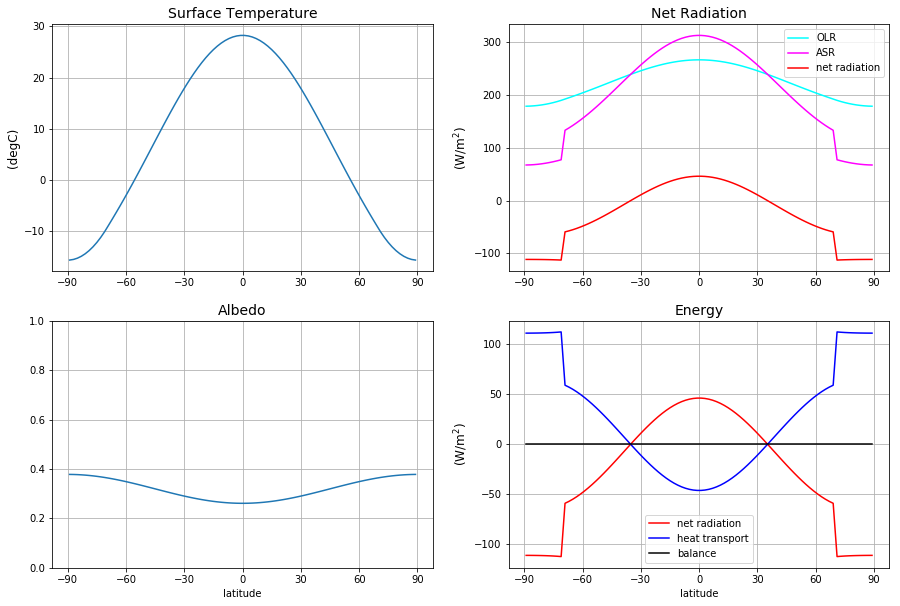

In [16]:
# creating plot figure
fig = plt.figure(figsize=(15,10))

# Temperature plot
ax1 = fig.add_subplot(221)
ax1.plot(ebm_model.lat,ebm_model.Ts)

ax1.set_xticks([-90,-60,-30,0,30,60,90])
ax1.set_xlim([-90,90])
ax1.set_title('Surface Temperature', fontsize=14)
ax1.set_ylabel('(degC)', fontsize=12)
ax1.grid()

# Albedo plot
ax2 = fig.add_subplot(223, sharex = ax1)
ax2.plot(ebm_model.lat,ebm_model.albedo)

ax2.set_title('Albedo', fontsize=14)
ax2.set_xlabel('latitude', fontsize=10)
ax2.set_ylim([0,1])
ax2.grid()

# Net Radiation plot
ax3 = fig.add_subplot(222, sharex = ax1)
ax3.plot(ebm_model.lat, ebm_model.OLR, label='OLR',
                                       color='cyan')
ax3.plot(ebm_model.lat, ebm_model.ASR, label='ASR',
                                       color='magenta')
ax3.plot(ebm_model.lat, ebm_model.ASR-ebm_model.OLR, 
                                       label='net radiation',
                                       color='red')

ax3.set_title('Net Radiation', fontsize=14)
ax3.set_ylabel('(W/m$^2$)', fontsize=12)
ax3.legend(loc='best')
ax3.grid()

# Energy Balance plot
net_rad = np.squeeze(ebm_model.net_radiation)
transport = ebm_model.heat_transport_convergence()

ax4 = fig.add_subplot(224, sharex = ax1)
ax4.plot(ebm_model.lat, net_rad, label='net radiation', 
                                              color='red')
ax4.plot(ebm_model.lat, transport, label='heat transport', 
                                              color='blue')
ax4.plot(ebm_model.lat, net_rad+transport, label='balance',
                                             color='black')

ax4.set_title('Energy', fontsize=14)
ax4.set_xlabel('latitude', fontsize=10)
ax4.set_ylabel('(W/m$^2$)', fontsize=12)
ax4.legend(loc='best')
ax4.grid()


plt.show()

The energy balance is zero at every latitude. That means the model is in equilibrium. Perfect!

### Global mean temperature

The model's state dictionary has following entries:

In [17]:
ebm_model.state.keys()

['Ts']

Like diagnostics, state variables can be accessed in two ways:

- With dictionary methods, ``ebm_model.state['Ts']`` 
- As process attributes, ``ebm_model.Ts``

These are entirely equivalent:

In [18]:
ebm_model.Ts is ebm_model.state['Ts']

True

The global mean of the model's surface temperature can be calculated through

In [19]:
# calculate global mean temperature
climlab.global_mean(ebm_model.Ts)

14.288135944994597

In [20]:
print 'The global mean temperature is %s degC.' \
                               %np.round(climlab.global_mean(ebm_model.Ts),2)
    
print 'The modeled ice edge is at %s deg.' % np.max(ebm_model.icelat)

The global mean temperature is 14.29 degC.
The modeled ice edge is at 70.0 deg.
